In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [2]:
data = pd.read_json('./News_Category_Dataset_v3.json',lines=True) # lines for avoid the trailing error
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


Handling duplicate and null values

In [3]:
#delete the dublicate values
data.duplicated().sum() # count the total duplicate samples

13

In [4]:
data.drop_duplicates(keep='last',inplace=True)

In [5]:
#there can be dublicate of author names so check for the dublicate headline and short discription
data.duplicated(subset=['headline', 'short_description']).sum()

476

In [6]:
data.drop_duplicates(subset=['headline', 'short_description'],inplace=True,keep='last')

In [7]:
print("THe length of the datset after dublicate deletion------>",data.shape)

THe length of the datset after dublicate deletion------> (209038, 6)


Handling null values

In [8]:
data.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [9]:
# there is no null value instead of null they are blank so we need to check for the blank placess and delete that
data[data['headline'] == '']

,link,headline,category,short_description,authors,date
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [10]:
# drop the blank values
headline_blank = data['headline'] == ''
data = data[~headline_blank]
print("The length of the dataset ------>",data.shape)

The length of the dataset ------> (209036, 6)


In [11]:
#drop the blank short describtion column
description_blank = data['short_description']==''
print("the lenth of the blank description samples----->",len(data[description_blank]))
data = data[~description_blank]
print("THe length of the datset ---------------------->",data.shape)

the lenth of the blank description samples-----> 19610
THe length of the datset ----------------------> (189426, 6)


In [12]:
#drop the null author samples
author_blank = data['authors']==''
print("the lenth of the blank auhtor samples---------->",len(data[author_blank]))
data = data[~author_blank]
print("THe length of the datset ---------------------->",data.shape)

the lenth of the blank auhtor samples----------> 32853
THe length of the datset ----------------------> (156573, 6)


In [13]:
data.head(5)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


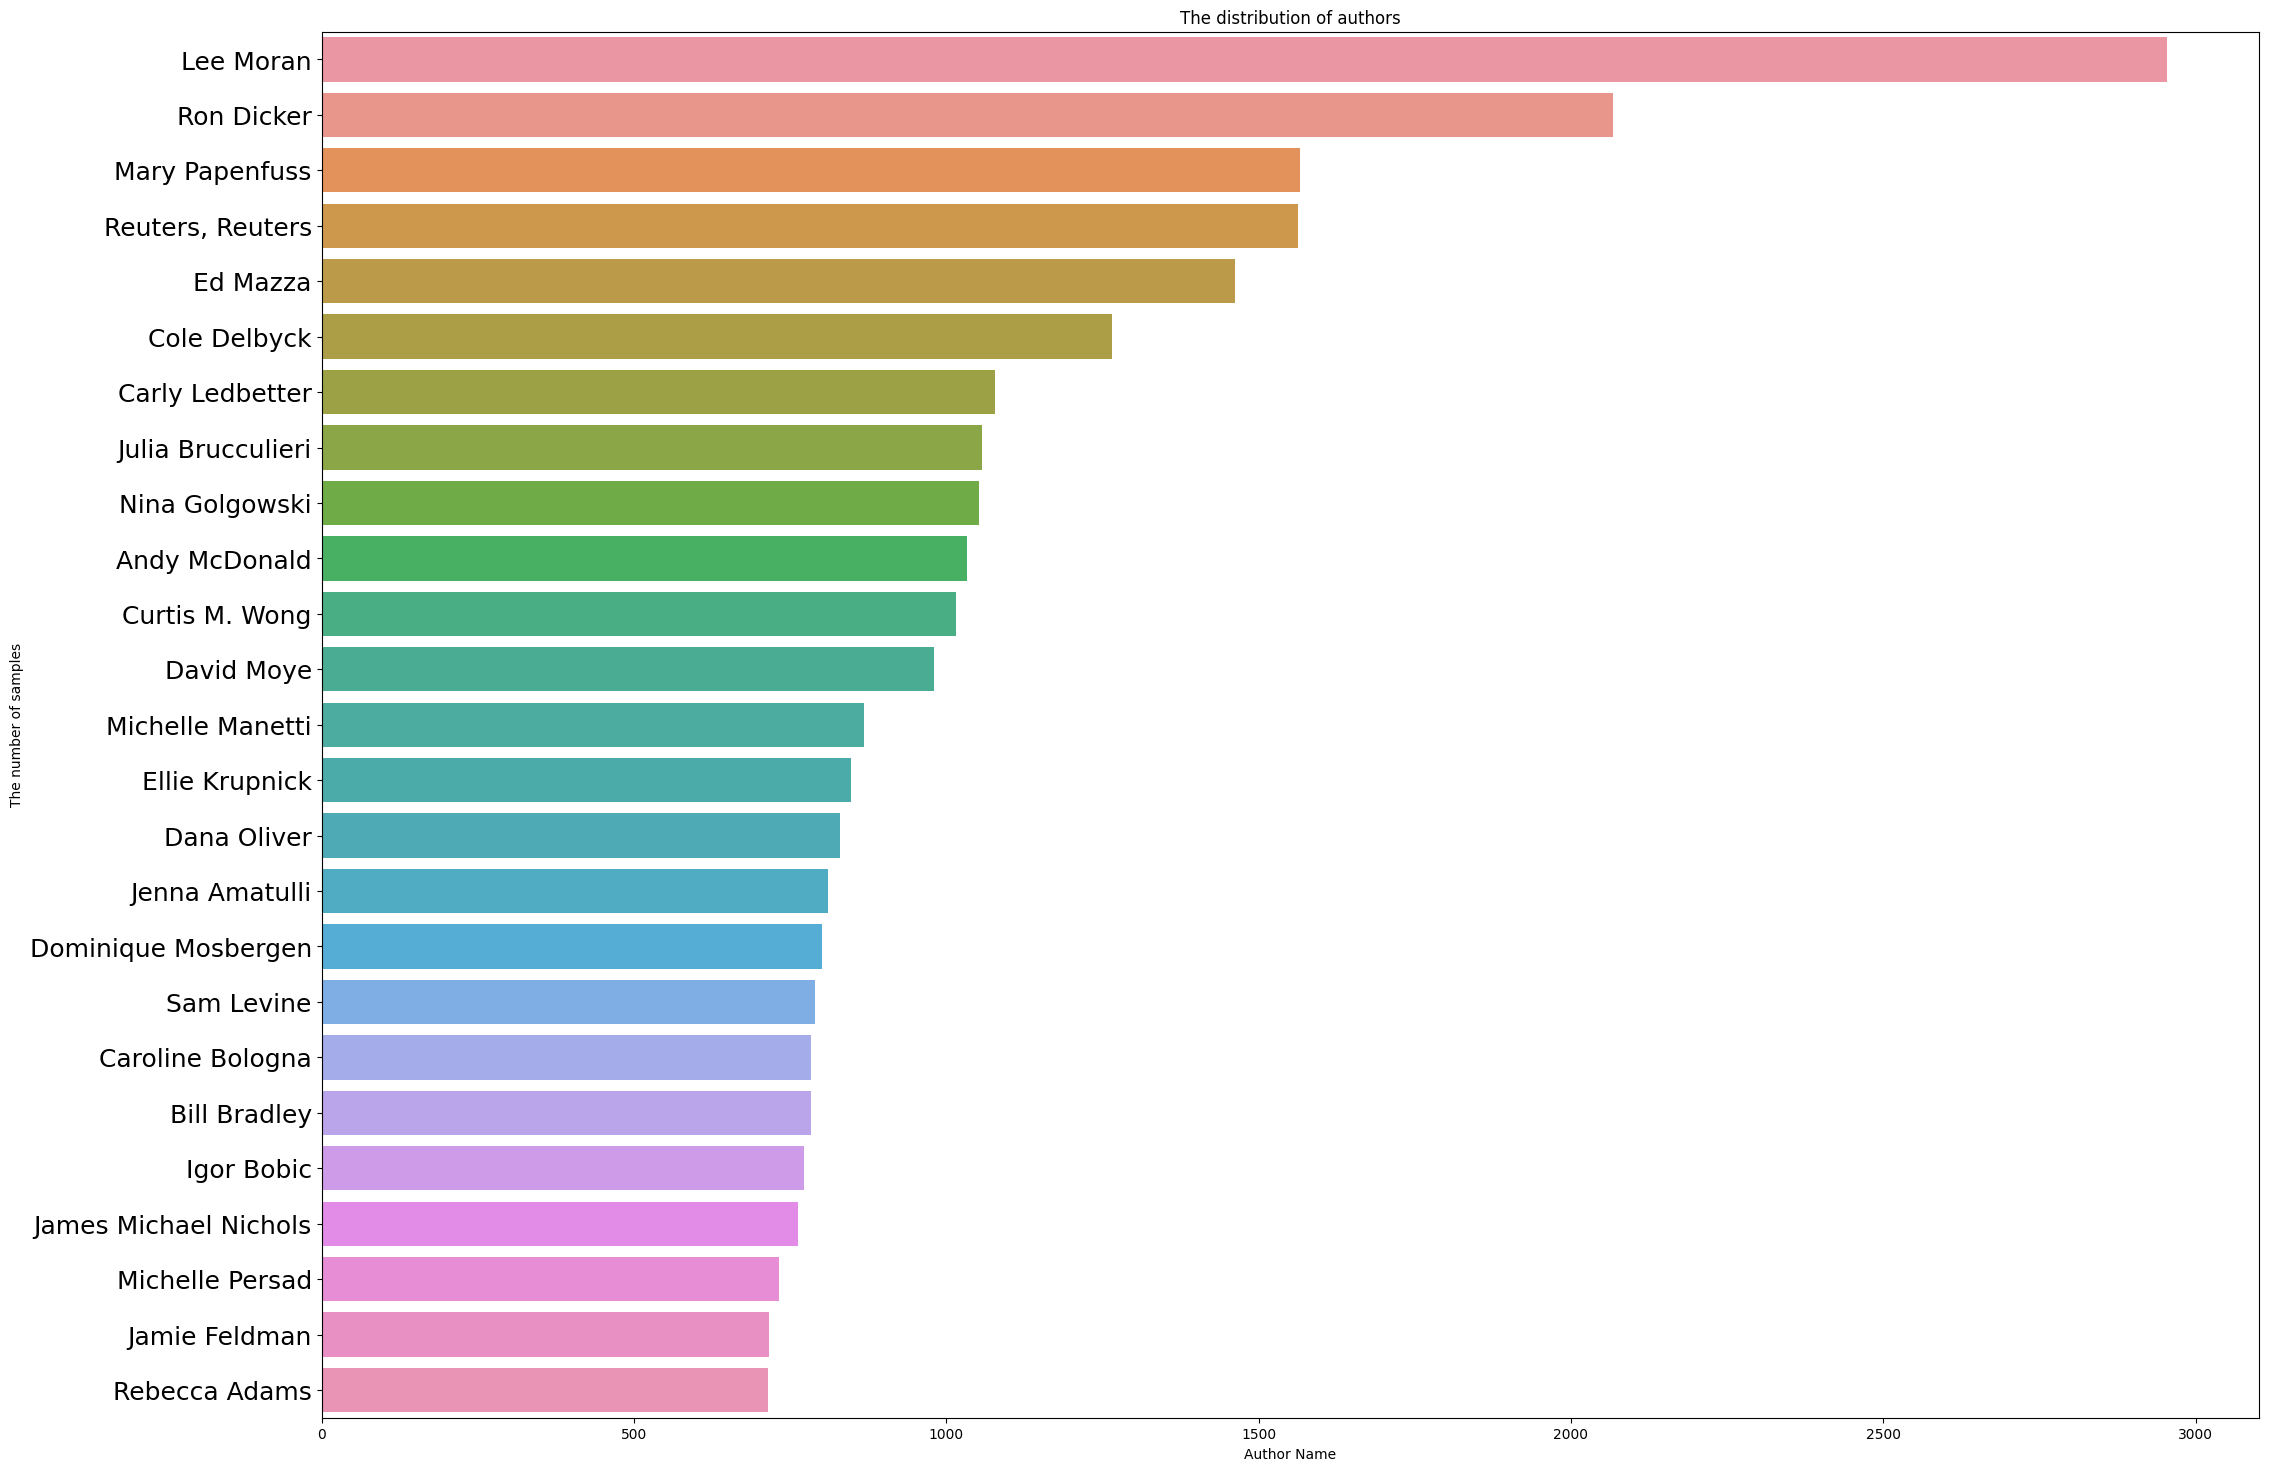

<Figure size 640x480 with 0 Axes>

In [14]:
#author
#auhtor plot
auhtor_count = data['authors'].value_counts()

plt.figure(figsize=(25,18))
sns.barplot(y=auhtor_count[:25].index,x=auhtor_count[:25].values)
plt.title("The distribution of authors")
plt.xlabel("Author Name")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 18)
plt.show()
plt.savefig(r"./author_bar.png")

Balance the category data

In [15]:
category = data['category'].value_counts()
list(category.index)

['POLITICS',
 'ENTERTAINMENT',
 'WELLNESS',
 'TRAVEL',
 'STYLE & BEAUTY',
 'PARENTING',
 'HEALTHY LIVING',
 'QUEER VOICES',
 'FOOD & DRINK',
 'BUSINESS',
 'COMEDY',
 'SPORTS',
 'HOME & LIVING',
 'PARENTS',
 'BLACK VOICES',
 'IMPACT',
 'WOMEN',
 'WORLD NEWS',
 'THE WORLDPOST',
 'MEDIA',
 'CRIME',
 'WEIRD NEWS',
 'TASTE',
 'RELIGION',
 'WEDDINGS',
 'DIVORCE',
 'GREEN',
 'TECH',
 'MONEY',
 'STYLE',
 'SCIENCE',
 'ARTS & CULTURE',
 'WORLDPOST',
 'U.S. NEWS',
 'FIFTY',
 'GOOD NEWS',
 'EDUCATION',
 'LATINO VOICES',
 'ARTS',
 'COLLEGE',
 'ENVIRONMENT',
 'CULTURE & ARTS']

In [16]:
cateo_keep = (data['category'] == 'POLITICS') | (data['category'] == 'WELLNESS' )| (data['category'] == 'ENTERTAINMENT') | (data['category'] == 'TRAVEL') | \
            (data['category'] == 'STYLE & BEAUTY') | (data['category'] == 'PARENTING' )| (data['category'] == 'HEALTHY LIVING') | (data['category'] == 'QUEER VOICES') | \
              (data['category'] == 'FOOD & DRINK') | (data['category'] == 'BUSINESS' )| (data['category'] == 'COMEDY') | (data['category'] == 'PARENTS') | (data['category'] == 'SPORTS') | (data['category'] == 'HOME & LIVING' )| (data['category'] == 'BLACK VOICES')
data = data[cateo_keep]


In [17]:
category = data['category'].value_counts()
category

POLITICS          29673
ENTERTAINMENT     13461
WELLNESS          12944
TRAVEL             8021
STYLE & BEAUTY     7173
PARENTING          6517
HEALTHY LIVING     5071
QUEER VOICES       4699
FOOD & DRINK       4527
BUSINESS           4372
COMEDY             3934
SPORTS             3608
HOME & LIVING      3490
PARENTS            3451
BLACK VOICES       3310
Name: category, dtype: int64

In [18]:
data_1 = data[data['category'] == 'POLITICS']
data_1 = resample(data_1, replace=False, n_samples=3000, random_state=123)
data_2 = data[data['category'] == 'WELLNESS']
data_2 = resample(data_2, replace=False, n_samples=3000, random_state=123)
data_3 = data[data['category'] == 'ENTERTAINMENT']
data_3 = resample(data_3, replace=False, n_samples=3000, random_state=123)
data_4 = data[data['category'] == 'TRAVEL']
data_4 = resample(data_4, replace=False, n_samples=3000, random_state=123)
data_5 = data[data['category'] == 'STYLE & BEAUTY']
data_5 = resample(data_5, replace=False, n_samples=3000, random_state=123)
data_6 = data[data['category'] == 'PARENTING']
data_6 = resample(data_6, replace=False, n_samples=3000, random_state=123)
data_7 = data[data['category'] == 'HEALTHY LIVING']
data_7 = resample(data_7, replace=False, n_samples=3000, random_state=123)
data_8 = data[data['category'] == 'QUEER VOICES']
data_8 = resample(data_8, replace=False, n_samples=3000, random_state=123)
data_9 = data[data['category'] == 'FOOD & DRINK']
data_9 = resample(data_9, replace=False, n_samples=3000, random_state=123)
data_10 = data[data['category'] == 'BUSINESS']
data_10 = resample(data_10, replace=False, n_samples=3000, random_state=123)
data_11 = data[data['category'] == 'COMEDY']
data_11 = resample(data_11, replace=False, n_samples=3000, random_state=123)
data_12= data[data['category'] == 'PARENTS']
data_12 = resample(data_12, replace=False, n_samples=3000, random_state=123)
data_13= data[data['category'] == 'SPORTS']
data_13 = resample(data_13, replace=False, n_samples=3000, random_state=123)
data_14 = data[data['category'] == 'HOME & LIVING']
data_14 = resample(data_14, replace=False, n_samples=3000, random_state=123)
data_15 = data[data['category'] == 'BLACK VOICES']
data_15 = resample(data_15, replace=False, n_samples=3000, random_state=123)

cato_list = [data_1 , data_2 , data_3 , data_4 ,data_5 , data_6 , data_7, data_8 , data_9 , data_10, data_11 , data_12 , data_13, data_14 ,data_15]

data = pd.concat(cato_list)
data['category'].value_counts()

POLITICS          3000
WELLNESS          3000
ENTERTAINMENT     3000
TRAVEL            3000
STYLE & BEAUTY    3000
PARENTING         3000
HEALTHY LIVING    3000
QUEER VOICES      3000
FOOD & DRINK      3000
BUSINESS          3000
COMEDY            3000
PARENTS           3000
SPORTS            3000
HOME & LIVING     3000
BLACK VOICES      3000
Name: category, dtype: int64

Column Combining

In [19]:
data['text'] = data['headline']+' '+data['short_description']
#drop the other columns
data.drop(['authors','headline','short_description'],axis=1,inplace=True)


In [20]:
data = shuffle(data)
data.reset_index(inplace=True, drop=True)
data.head(4)

,link,category,date,text
0,https://www.huffingtonpost.com/entry/etsy-shop...,HOME & LIVING,2012-05-10,Etsy Shop Tour: The Story Behind Designer Ursu...
1,https://www.huffingtonpost.com/entry/how-do-mo...,BLACK VOICES,2014-12-30,"How Do Mothers of Slain, Unarmed Black Daughte..."
2,https://www.huffingtonpost.com/entry/beckerman...,STYLE & BEAUTY,2012-04-12,Beckerman Sisters' Anniversary: One Year In Ou...
3,https://www.huffingtonpost.com/entry/aumf-war-...,POLITICS,2018-04-16,Senators Unveil Bipartisan War Authorization B...


Test cleaning

In [21]:
"""corpus=[]
for i in range(100000):
    text = data.iloc[i,1]

    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = text.split()

    s = PorterStemmer()
    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    corpus.append(text)

    if i%1000==0:
        print(i,end='->')"""


"corpus=[]\nfor i in range(100000):\n    text = data.iloc[i,1]\n\n    text = text.lower()\n    text = re.sub('[^a-z0-9]',' ',text)\n    text = text.split()\n\n    s = PorterStemmer()\n    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]\n    text = ' '.join(text)\n    corpus.append(text)\n\n    if i%1000==0:\n        print(i,end='->')"

In [22]:
"""corpus = pd.read_csv('../input/corpus/corpus.csv')
corpus"""

"corpus = pd.read_csv('../input/corpus/corpus.csv')\ncorpus"

Model SVM

In [23]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(data['text'], data['category'], test_size=0.3, random_state=32)

In [24]:
sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None))
])

sgd.fit(X_TRAIN, Y_TRAIN)
Y_PRED = sgd.predict(X_TEST)

print('accuracy %s : ' % accuracy_score(Y_PRED, Y_TEST))
print(classification_report(Y_TEST, Y_PRED))

accuracy 0.6303703703703704 : 
                precision    recall  f1-score   support

  BLACK VOICES       0.65      0.64      0.64       928
      BUSINESS       0.69      0.67      0.68       911
        COMEDY       0.65      0.58      0.61       906
 ENTERTAINMENT       0.65      0.46      0.54       884
  FOOD & DRINK       0.65      0.84      0.73       879
HEALTHY LIVING       0.51      0.32      0.39       884
 HOME & LIVING       0.60      0.81      0.69       894
     PARENTING       0.52      0.43      0.47       931
       PARENTS       0.52      0.38      0.44       925
      POLITICS       0.68      0.72      0.70       937
  QUEER VOICES       0.68      0.81      0.74       857
        SPORTS       0.71      0.83      0.77       914
STYLE & BEAUTY       0.67      0.79      0.73       887
        TRAVEL       0.64      0.76      0.69       877
      WELLNESS       0.51      0.43      0.46       886

      accuracy                           0.63     13500
     macro avg 